# Vehicle Detection using YOLO with ResNet feature extractor#

** Main video pipeline for the Vehicle Detection project **

#### Imports ####

In [1]:
import sys
import numpy as np
import cv2
import utils
import matplotlib.pyplot as plt
from model_continue_train import ResNet50
import time
from moviepy.editor import VideoFileClip

%matplotlib inline

C:\Users\admin\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Create & Load Model ###

In [2]:
%time model = ResNet50(include_top=False, load_weight=True, weights='models/rerun9_0.01_weights.02-2.05.hdf5', input_shape=(224,224,3))

Wall time: 6.48 s


#### Image Processing Pipeline: ####

In [3]:
def process_img(img):
    dims = (img.shape[1], img.shape[0])
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img_float = cv2.resize(img_bgr, (224,224)).astype(np.float32)
    img_float -= 128
    img_in = np.expand_dims(img_float, axis=0)
    
    pred = model.predict(img_in)
    
    bboxes = utils.get_boxes(pred[0], cutoff=0.2, dims=dims)
    bboxes = utils.nonmax_suppression(bboxes, iou_cutoff = 0.05)
    draw = utils.draw_boxes(img, bboxes, color=(0, 255, 0), thick=5, draw_dot=False, radius=3)
    draw = draw.astype(np.uint8)
    
    return draw

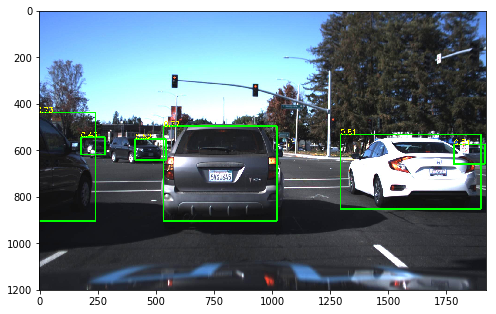

In [4]:
### Test pipeline on image from dataset itself
img = cv2.imread('test_img2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(process_img(img))

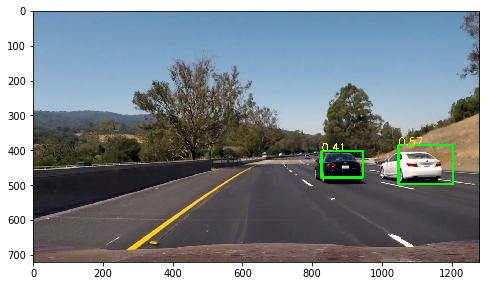

In [13]:
### Test pipeline on image the network has never seen before
img = cv2.imread('test_img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(process_img(img))

#### Apply to video: ####

In [14]:
video1 = 'project_video.mp4'
video1_output = 'project_video_output2.mp4'
clip1 = VideoFileClip(video1)#.subclip(30,36)
imgs = clip1.fl_image(process_img)
%time imgs.write_videofile(video1_output, audio=False)

[MoviePy] >>>> Building video project_video_output2.mp4
[MoviePy] Writing video project_video_output2.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [08:49<00:00,  2.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output2.mp4 

Wall time: 8min 50s
